C:\Users\sg041\AppData\Local\Temp\ipykernel_25276\1507648212.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


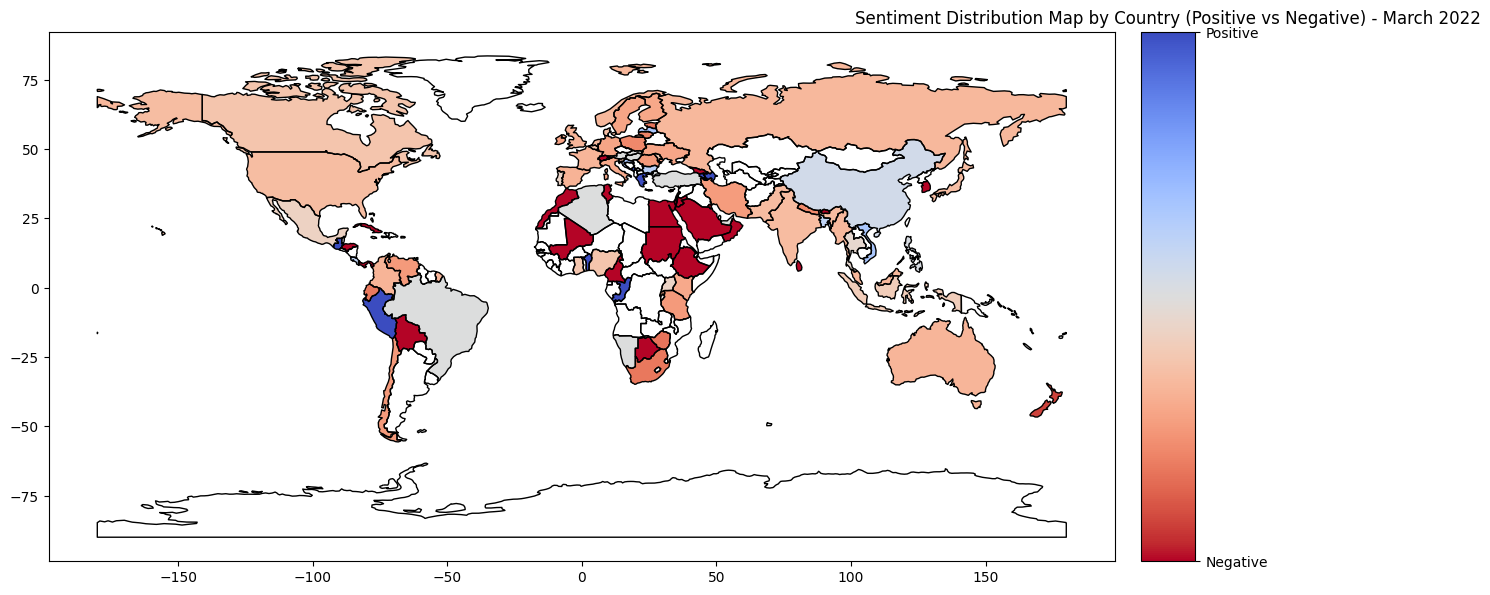

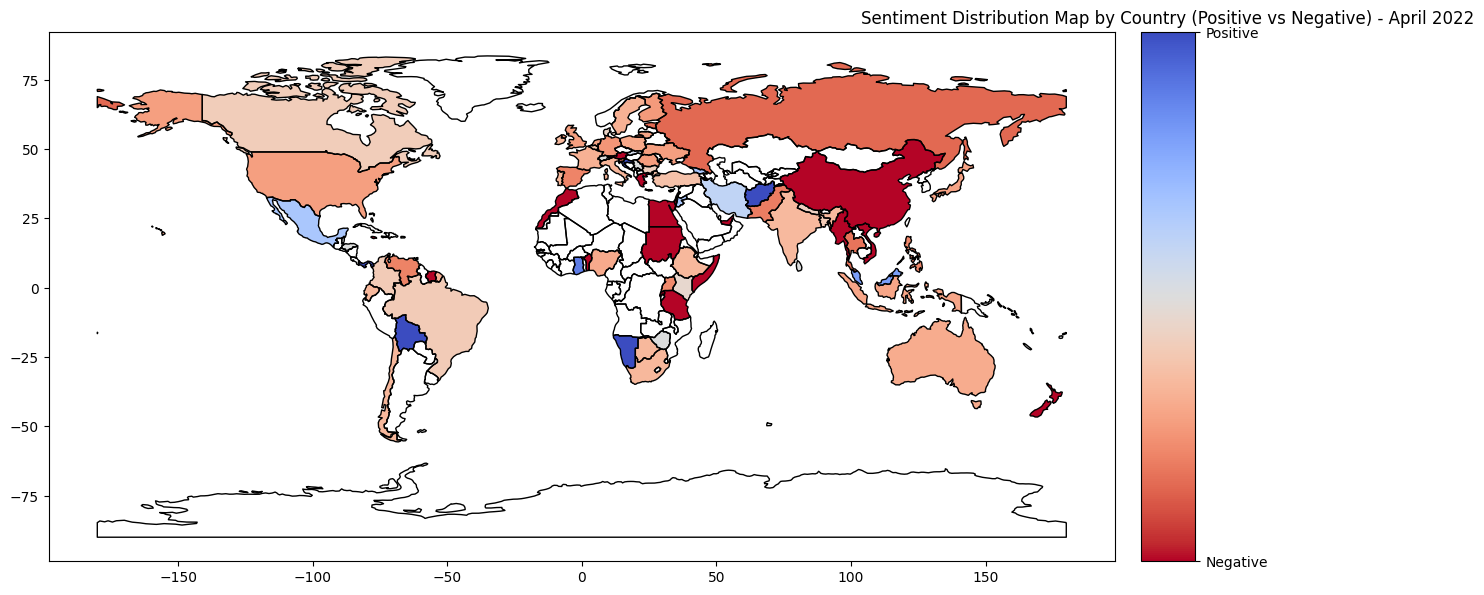

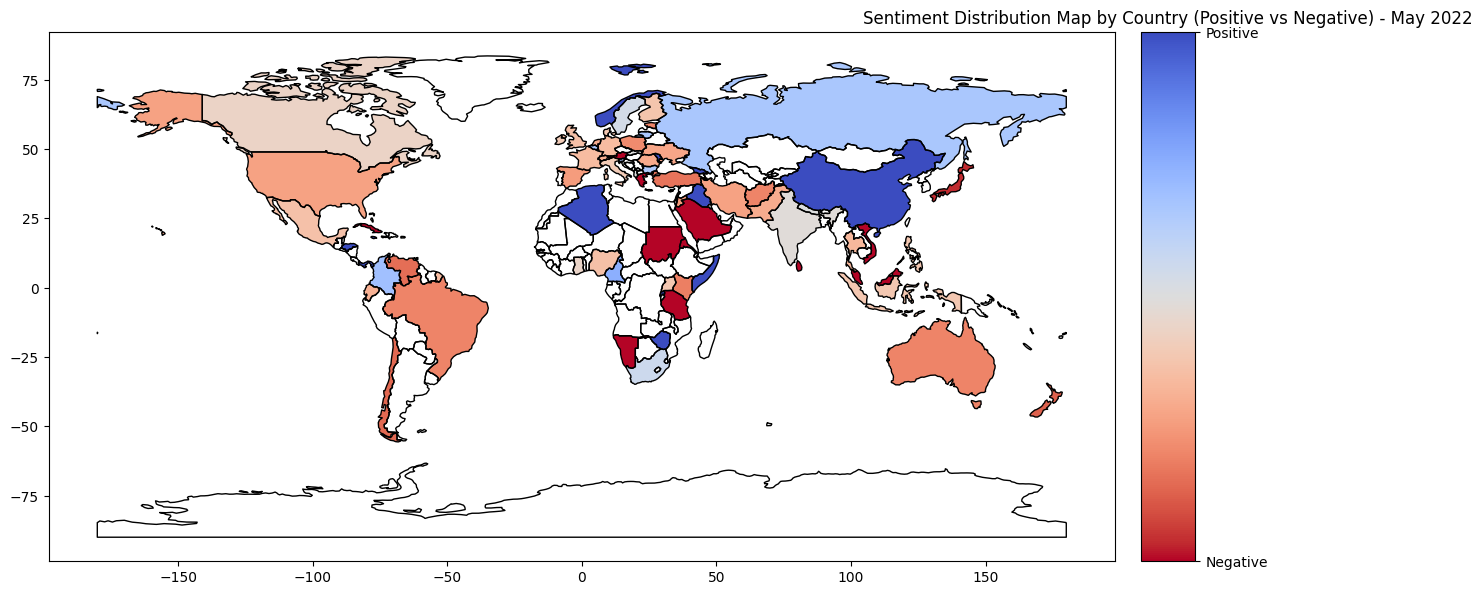

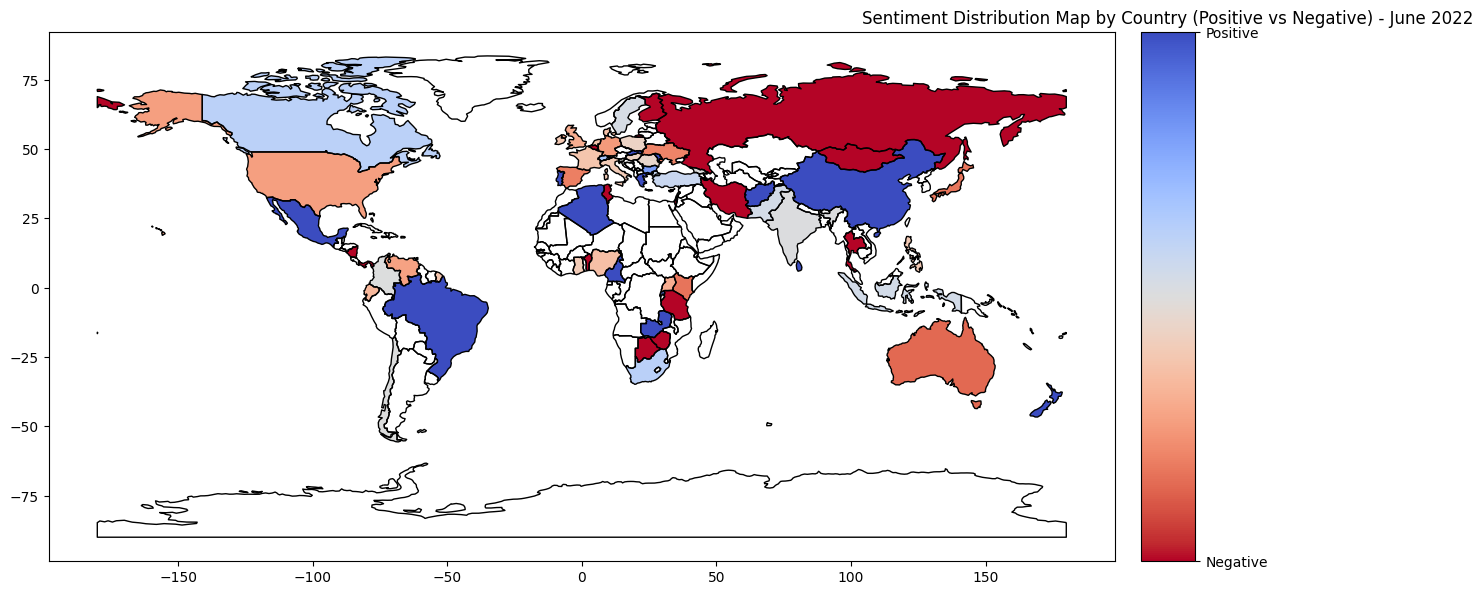

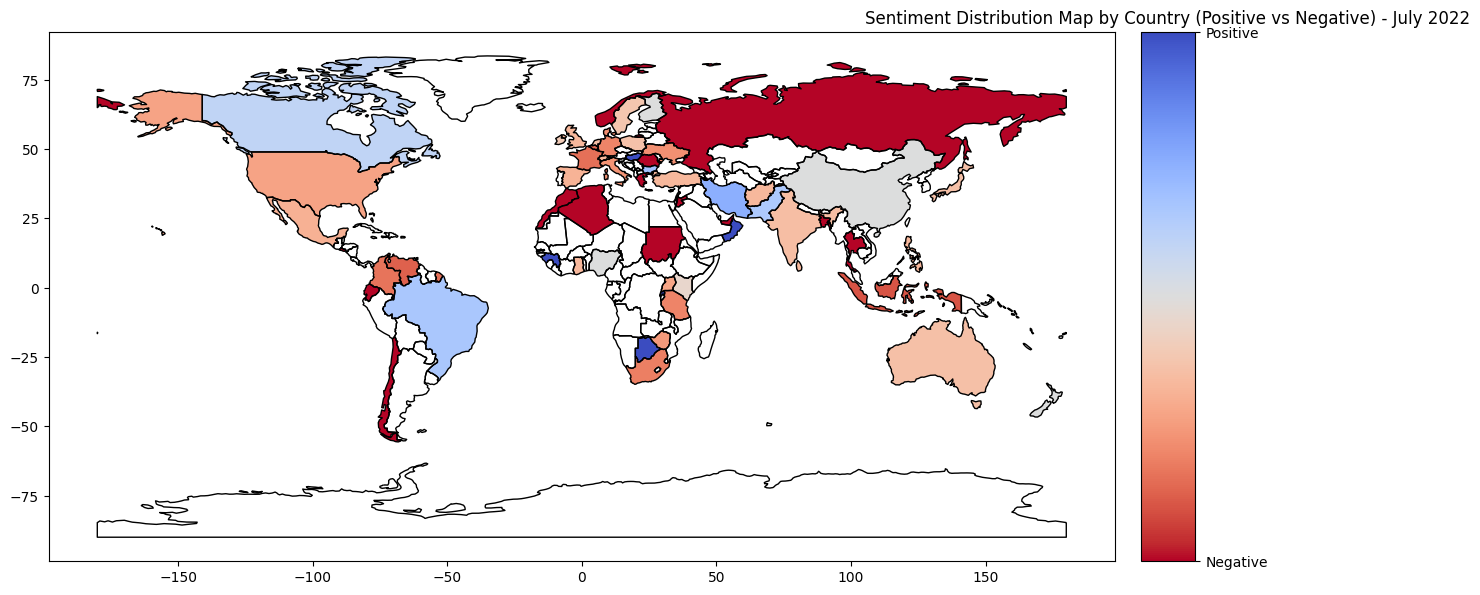

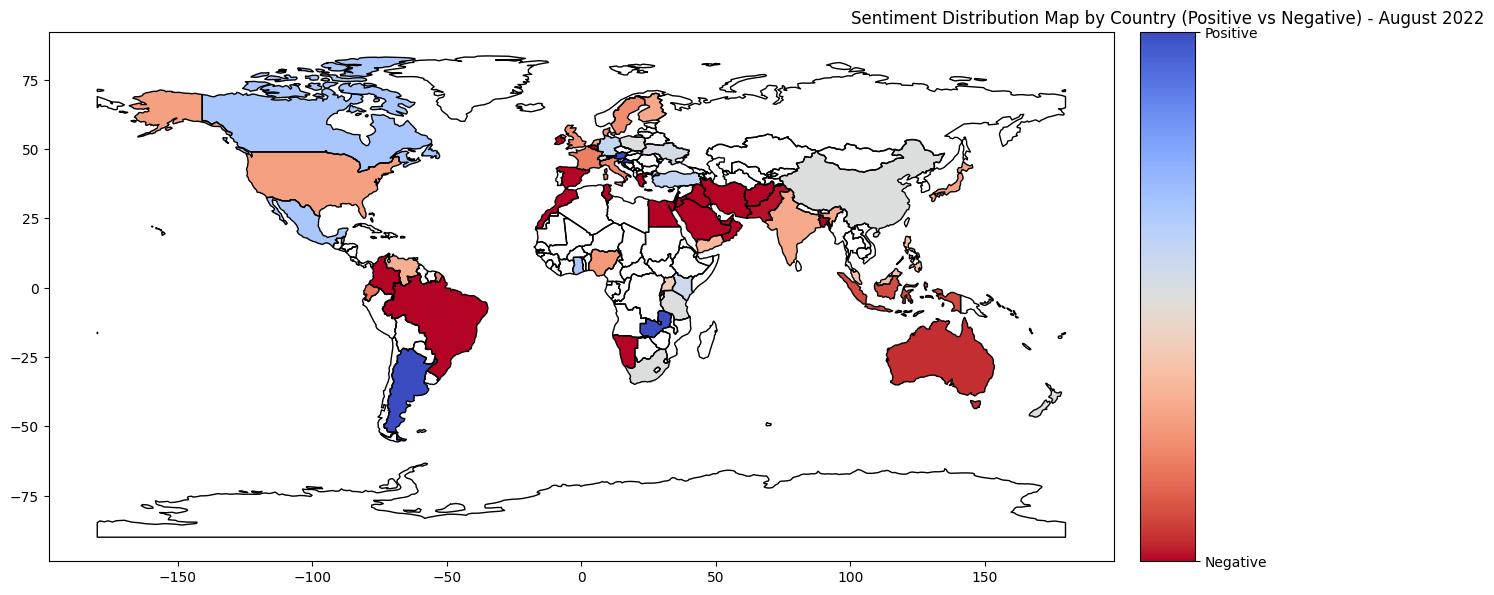

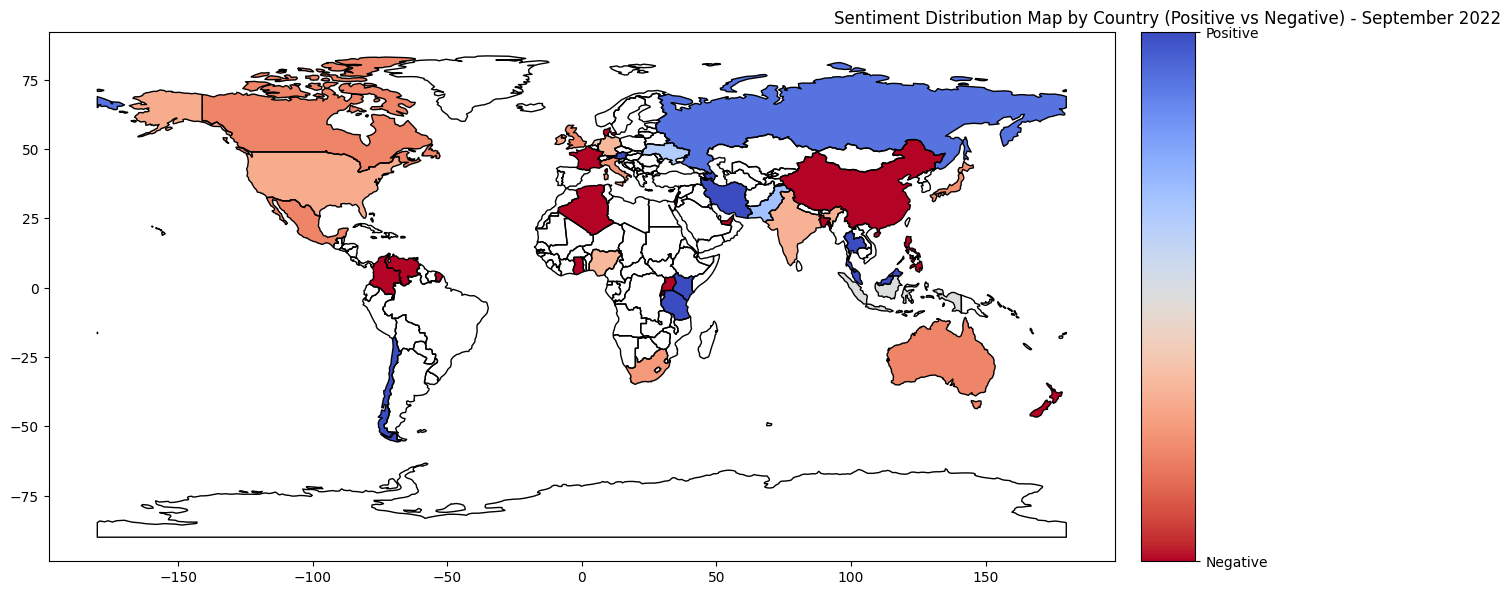

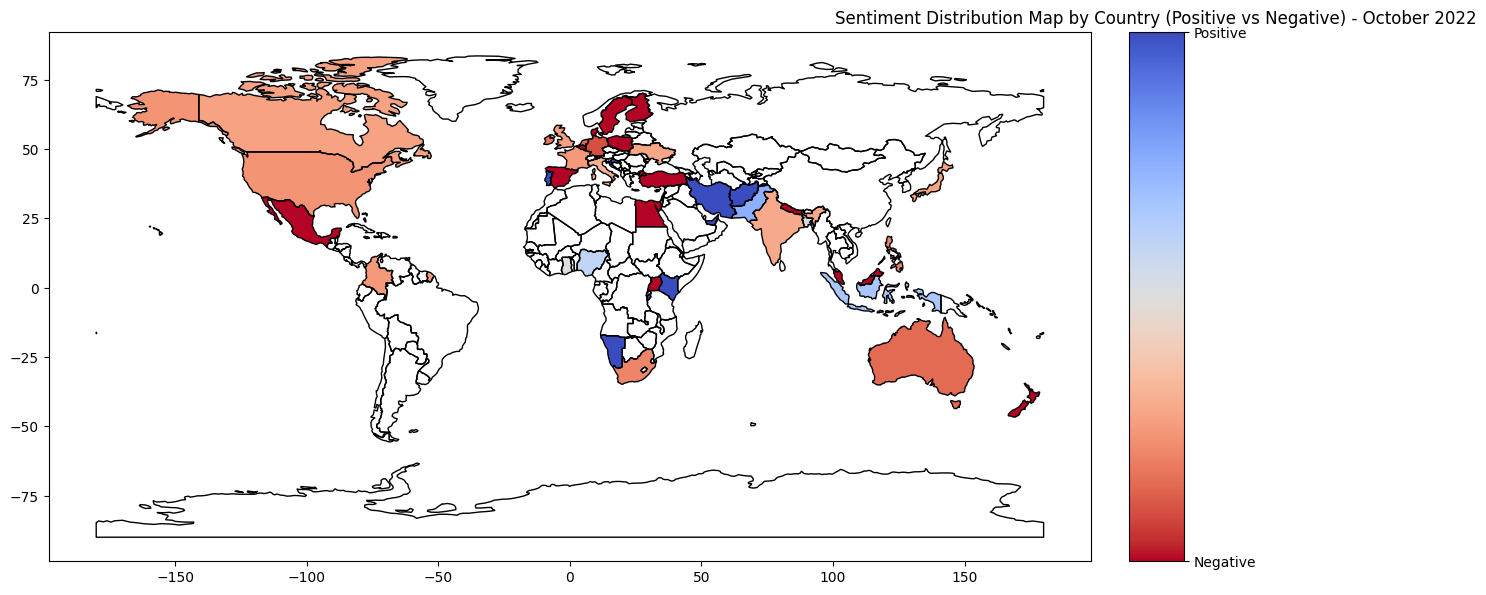

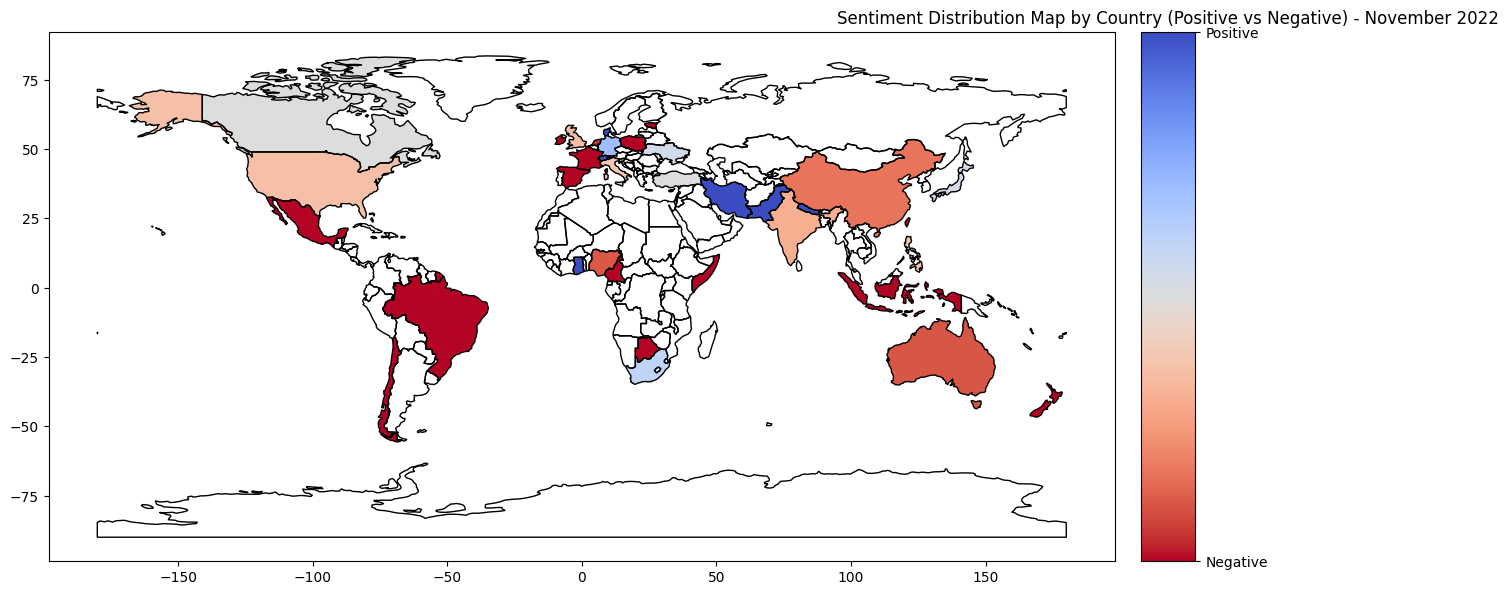

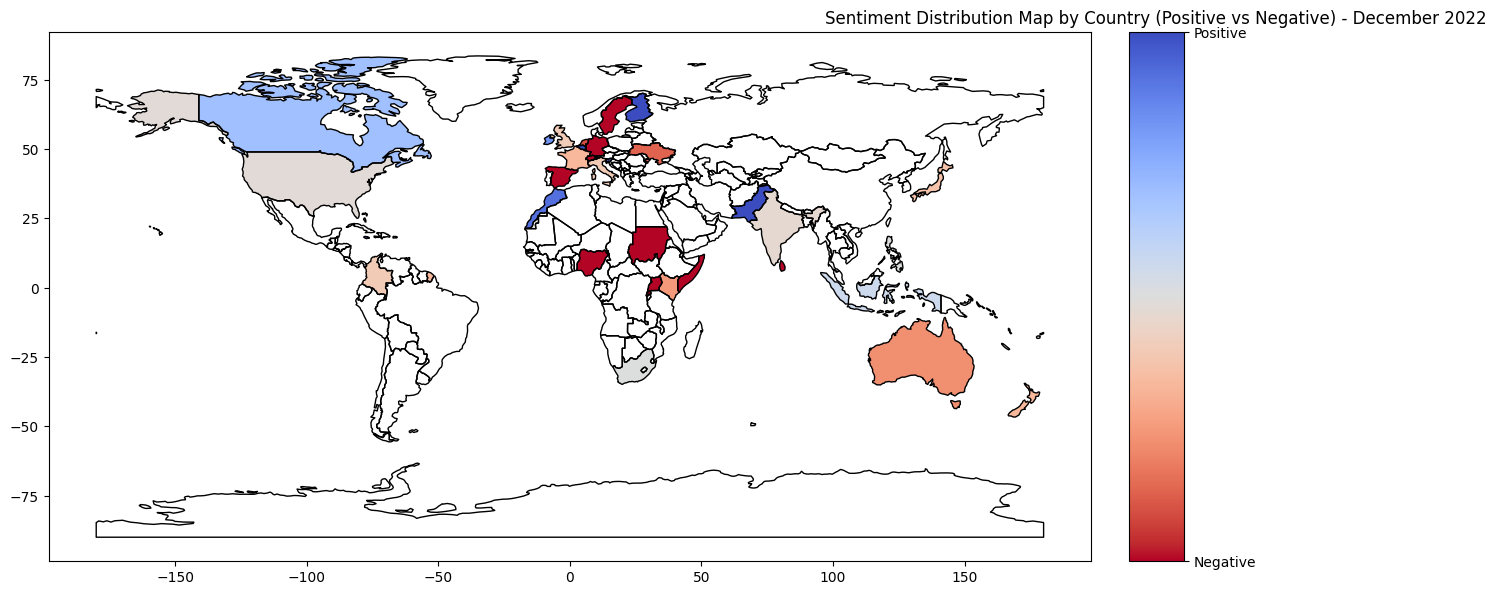

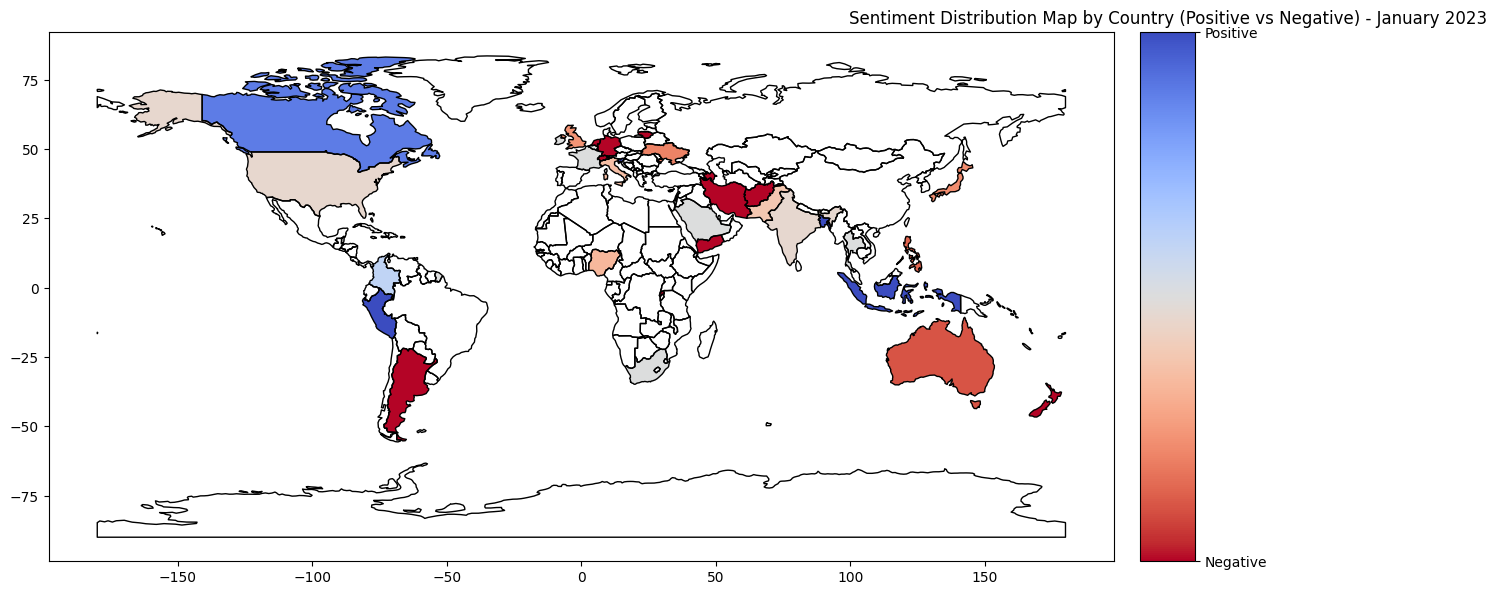

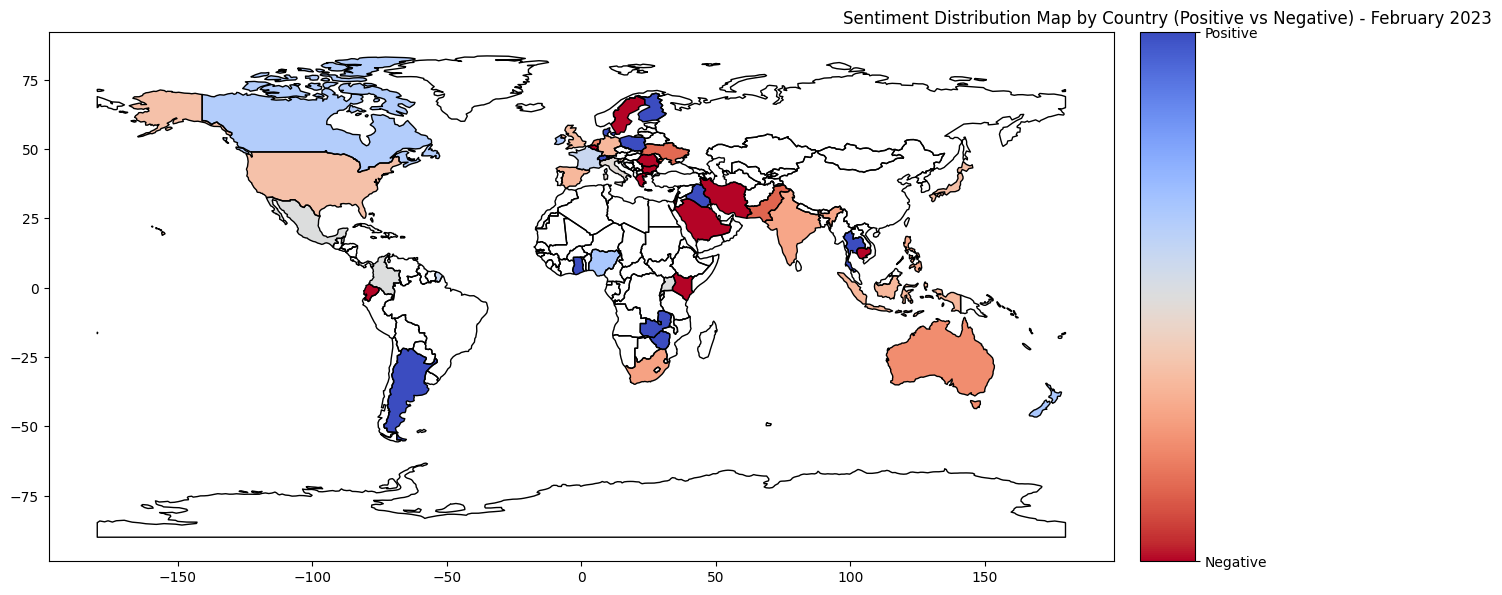

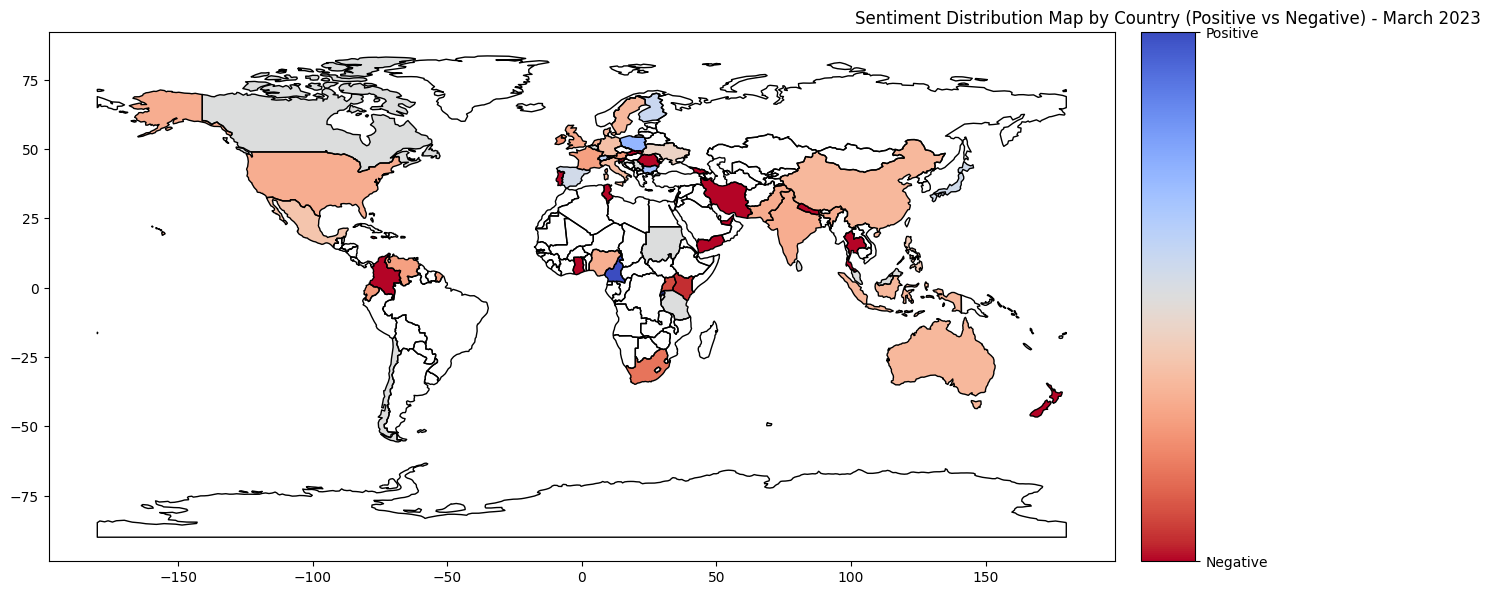

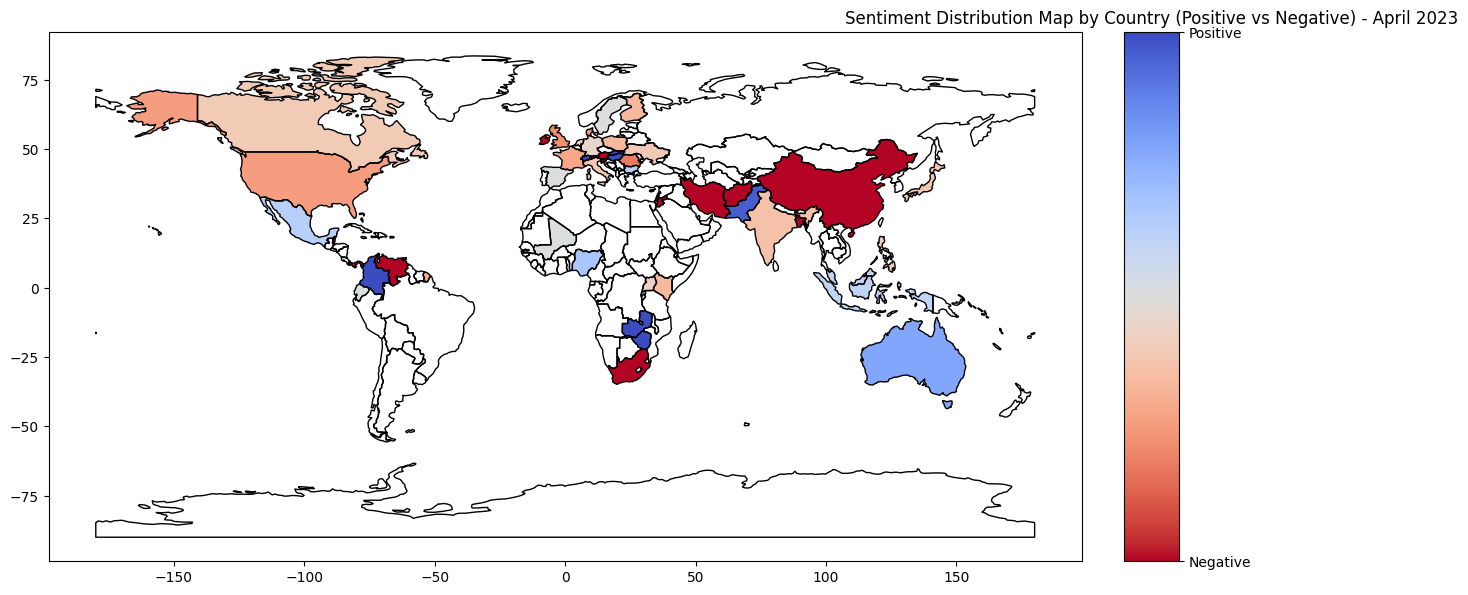

In [44]:
import os
import pandas as pd
import geopandas as gpd
import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


#BEGIN[ChatGPT][https://chat.openai.com/auth/login]

# I copy and pasted the ChatGPT to make a skeleton code and then I revised the code which did not work or weird

# command: By using the date,country, sentiment column, Plot the sentiment distribution on a monthly basis for countries as color 
#          Combine the sentiment values and the color of the countries in blue if the sentiment is predominantly positive and in red if the sentiment is predominantly negative.


# This code is designed to visualize the monthly distribution of sentiment (positive vs. negative) for a given set of tweets. 
# It processes tweet data grouped by country, calculates the sentiment sum for each country, and plots the results on a world map. 
# The sentiment sum is determined as the ratio of positive tweets to the total number of tweets (positive + negative). 
# The output is a series of world maps, each displaying the sentiment distribution for a specific month.

# Load the world GeoDataFrame

directory = 'merged_by_country_bert_processed_tweets'
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Prepare the date range
start_date = datetime.datetime(2022, 3, 1)
end_date = datetime.datetime(2023, 4, 30)
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')

# Loop through each month in the date range
for date in date_range:
    # Filter the data for the current month
    month_start = date
    month_end = date + pd.DateOffset(months=1) - pd.DateOffset(days=1)
    
    tweet_by_country = {}
    sentiments_by_country = {}
    
    for root, dirs, files in os.walk(directory):
        for filename in files:
            count += 1
            printProgressBar(count, total, filename=os.path.join(root, filename))
            df = pd.read_csv(os.path.join(root, filename), encoding='UTF-8')
            
            for index, tweet in df.iterrows():
                tweet_date = pd.to_datetime(tweet['date'], errors='coerce')
                if month_start <= tweet_date <= month_end:
                    country = tweet[3]
                    sentiment = tweet[-2]
                    if country not in tweet_by_country:
                        tweet_by_country[country] = 1
                        sentiments_by_country[country] = {'POSITIVE': 0, 'NEGATIVE': 0}
                        sentiments_by_country[country][sentiment] += 1
                    else:
                        tweet_by_country[country] += 1
                        sentiments_by_country[country][sentiment] += 1
                        
    sentiment_map_dict = {'country': [], 'sentiment_sum': []}
    
    for country in sentiments_by_country.keys():
        if country == 'United States':
            sentiment_map_dict['country'].append('United States of America')
        else:
            sentiment_map_dict['country'].append(country)

        sentiment_map_dict['sentiment_sum'].append(int(sentiments_by_country[country]['POSITIVE']) / (int(sentiments_by_country[country]['NEGATIVE']) + int(sentiments_by_country[country]['POSITIVE'])))
    
    # Create a new DataFrame for the current month's sentiment data
    month_sentiments = pd.DataFrame(sentiment_map_dict)

    # Merge the sentiment data with the world GeoDataFrame using the 'country' column
    world_merged = world.merge(month_sentiments, left_on='name', right_on='country')

    # Plot the sentiment distribution on the world map
    fig, ax = plt.subplots(1, figsize=(15, 10))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    world.boundary.plot(ax=ax, linewidth=1, color='black')
    sm = plt.cm.ScalarMappable(cmap='coolwarm_r')
    sm.set_array(world_merged['sentiment_sum'])

    world_merged.plot(column='sentiment_sum', cmap='coolwarm_r', ax=ax)

    # Customize the colorbar
    cbar = fig.colorbar(sm, cax=cax)
    cbar.set_ticks([cbar.vmin, cbar.vmax])
    cbar.set_ticklabels(['Negative', 'Positive'])

    plt.title(f"Sentiment Distribution Map by Country (Positive vs Negative) - {month_start.strftime('%B %Y')}")
    plt.show()

#END[ChatGPT]



C:\Users\sg041\AppData\Local\Temp\ipykernel_25276\3216400561.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


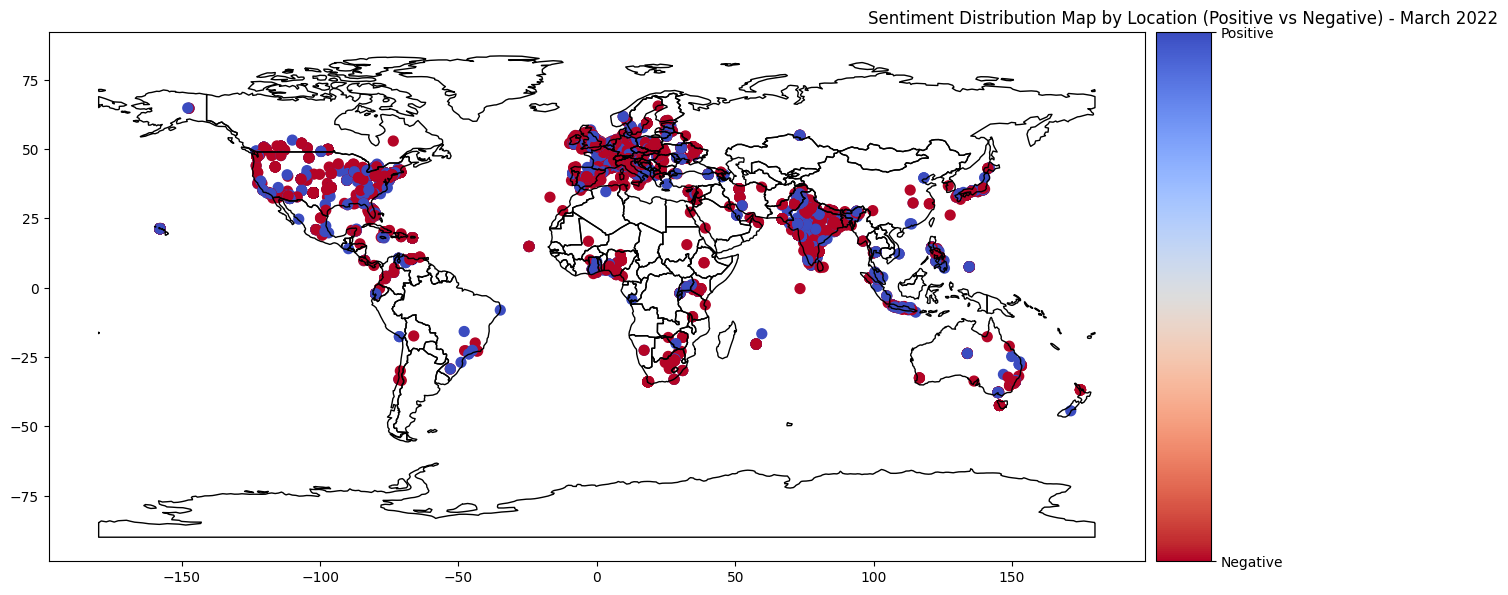

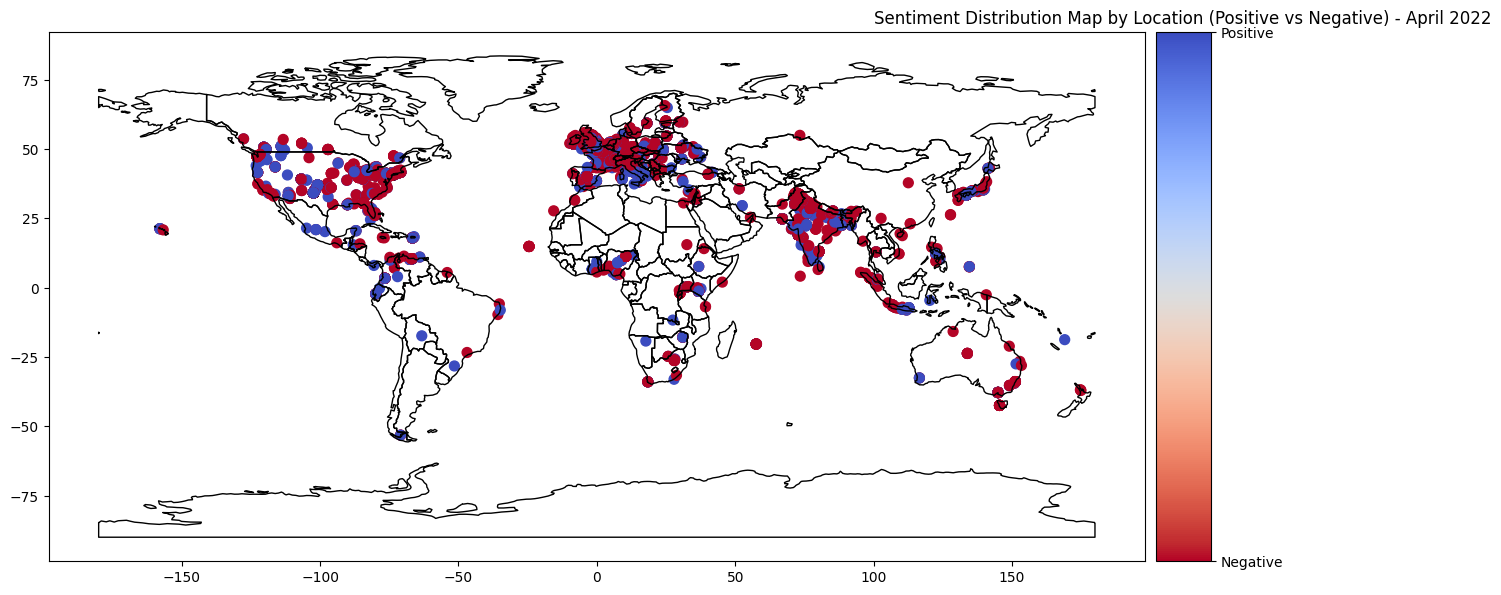

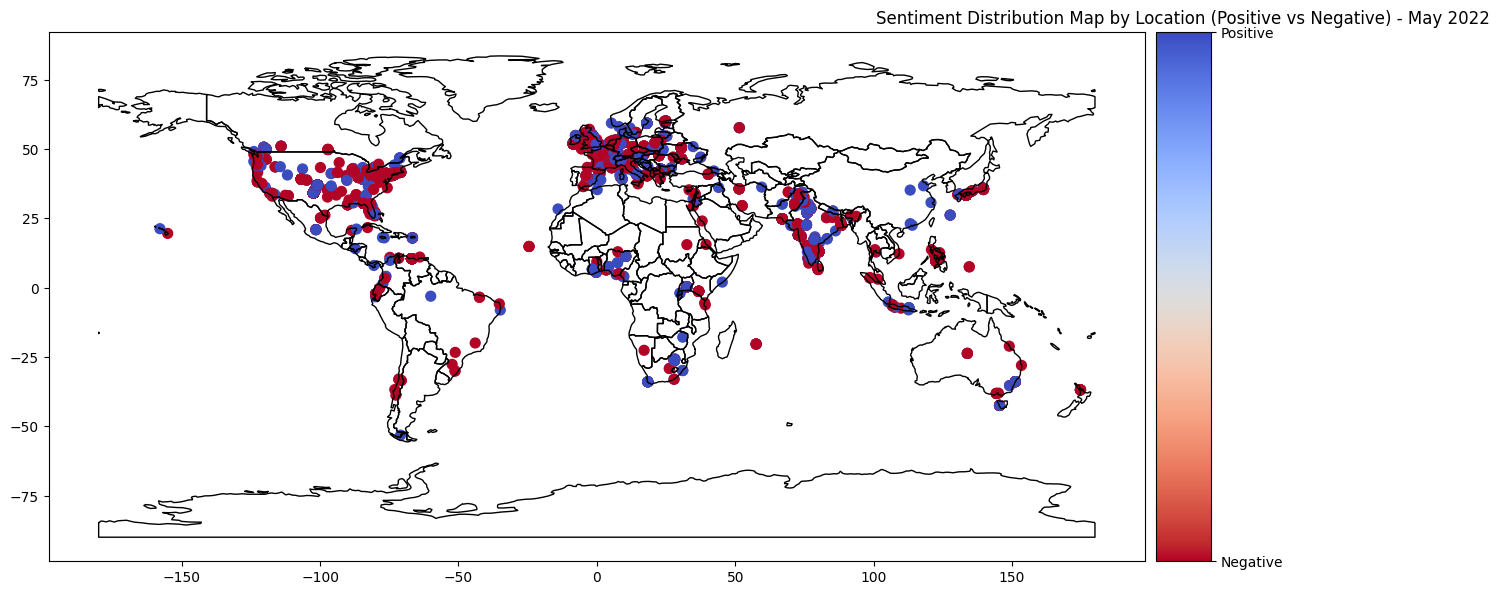

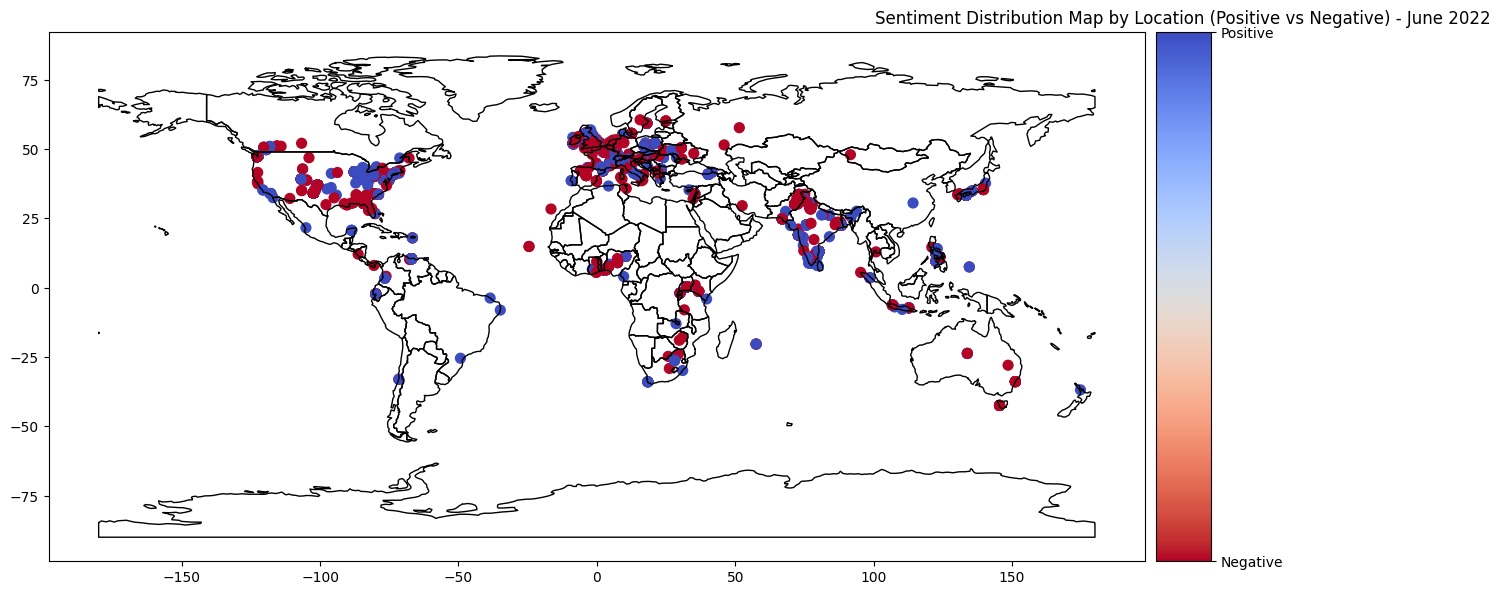

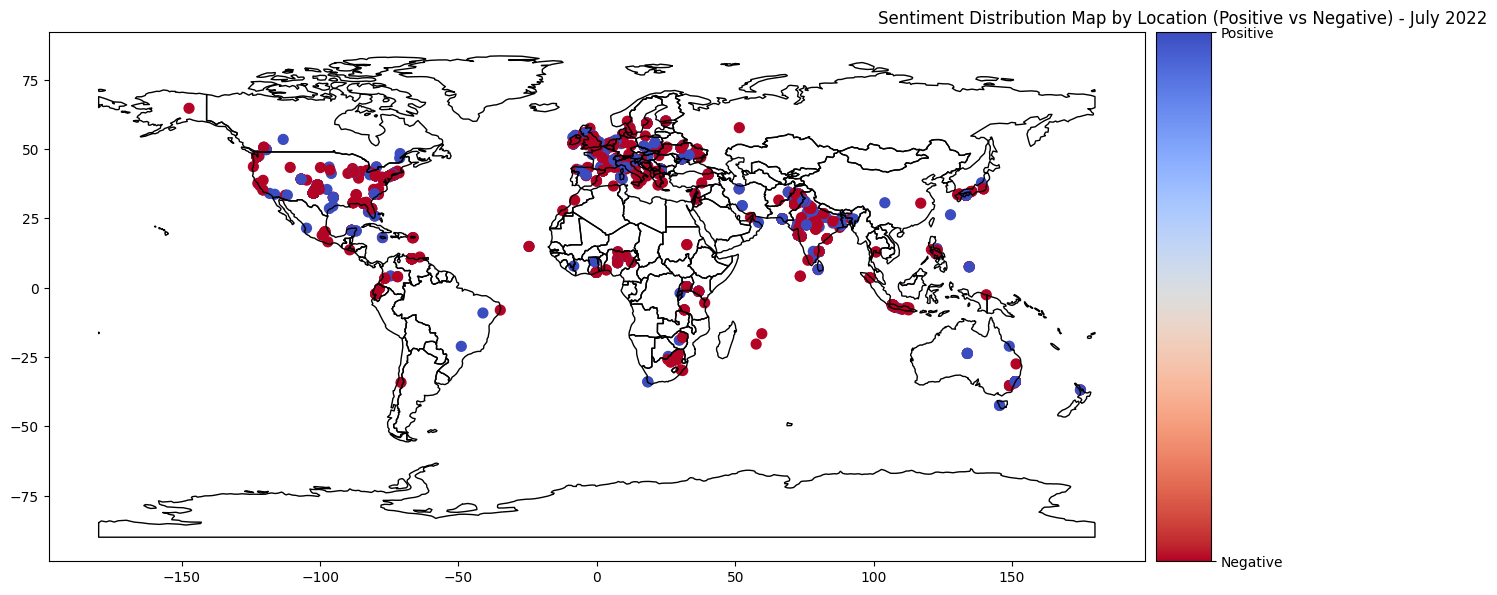

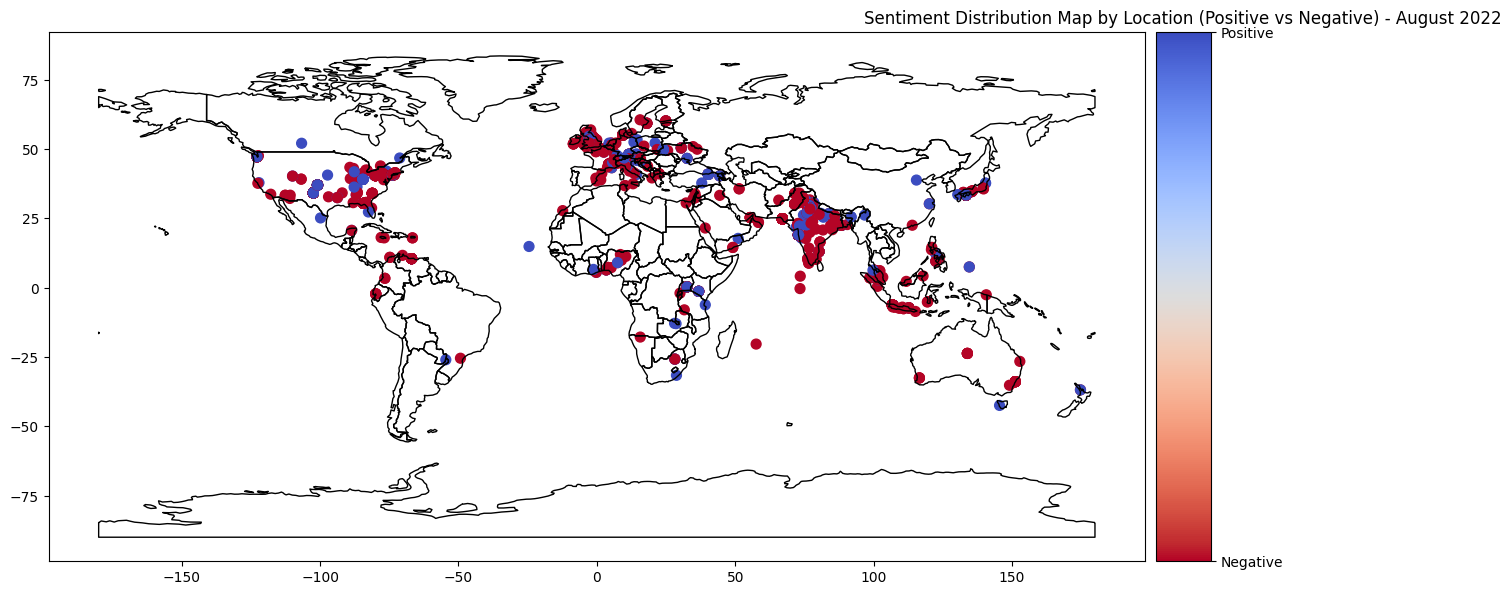

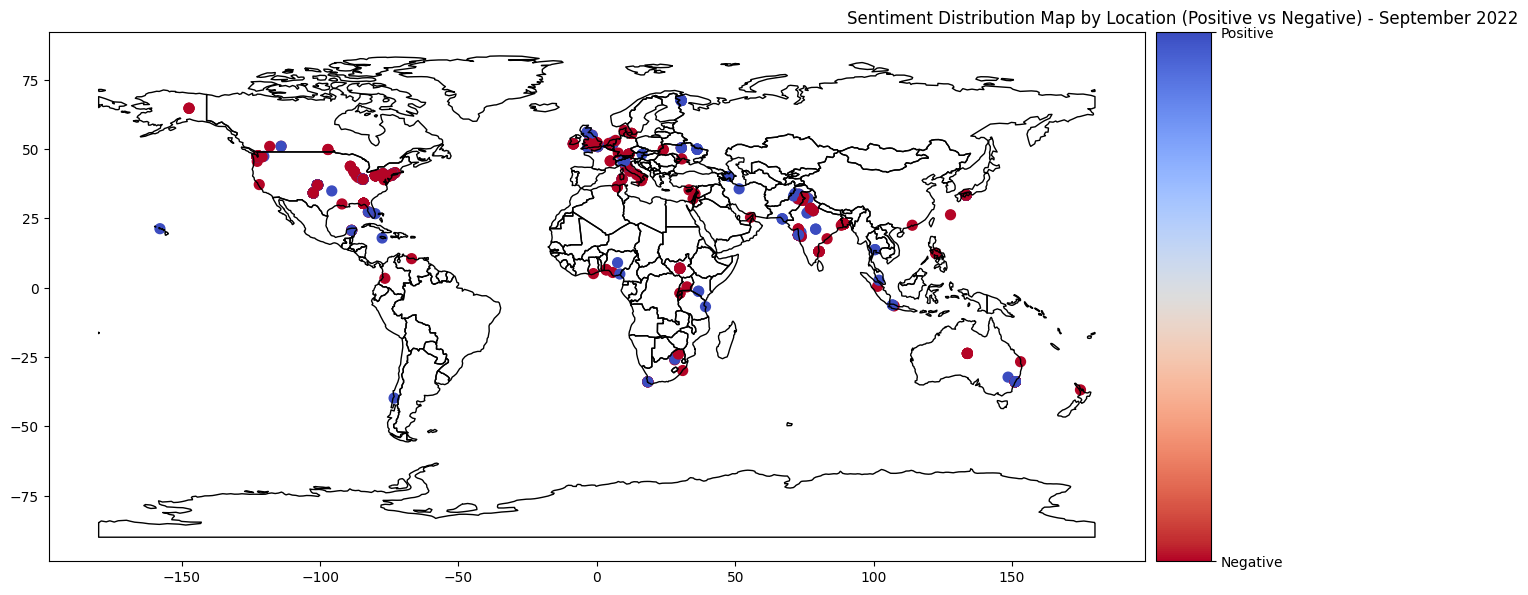

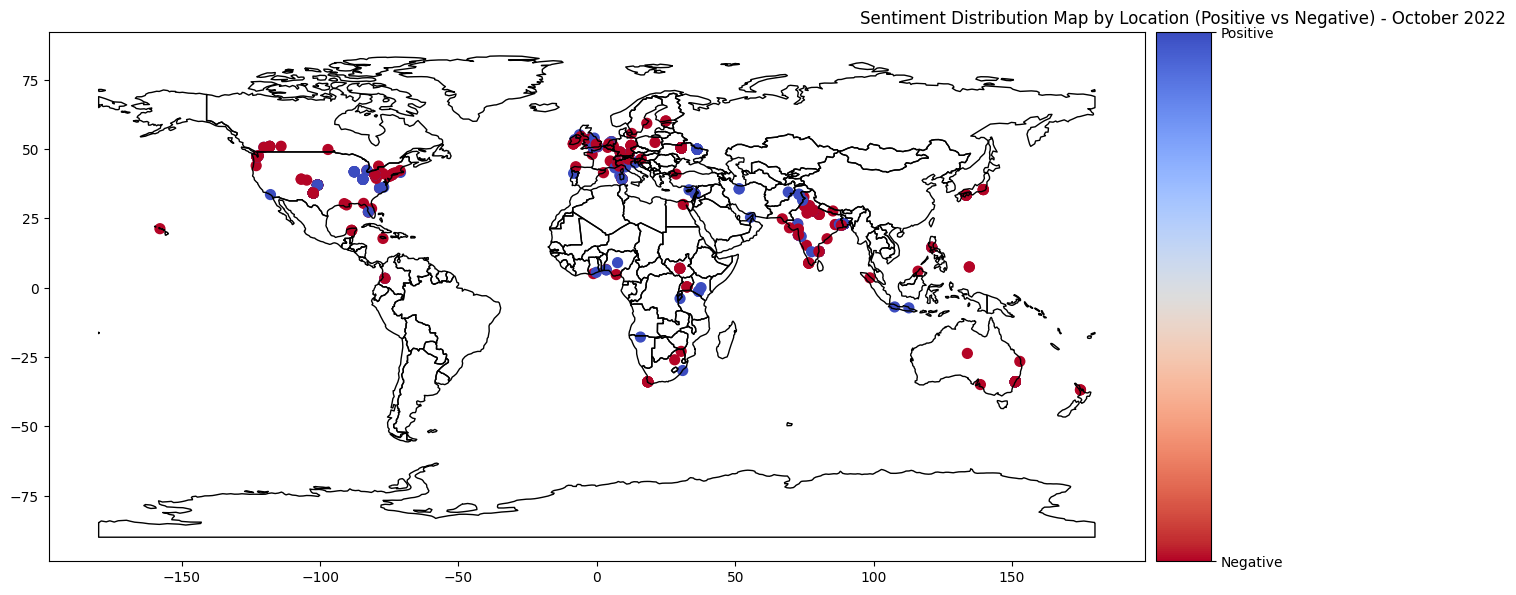

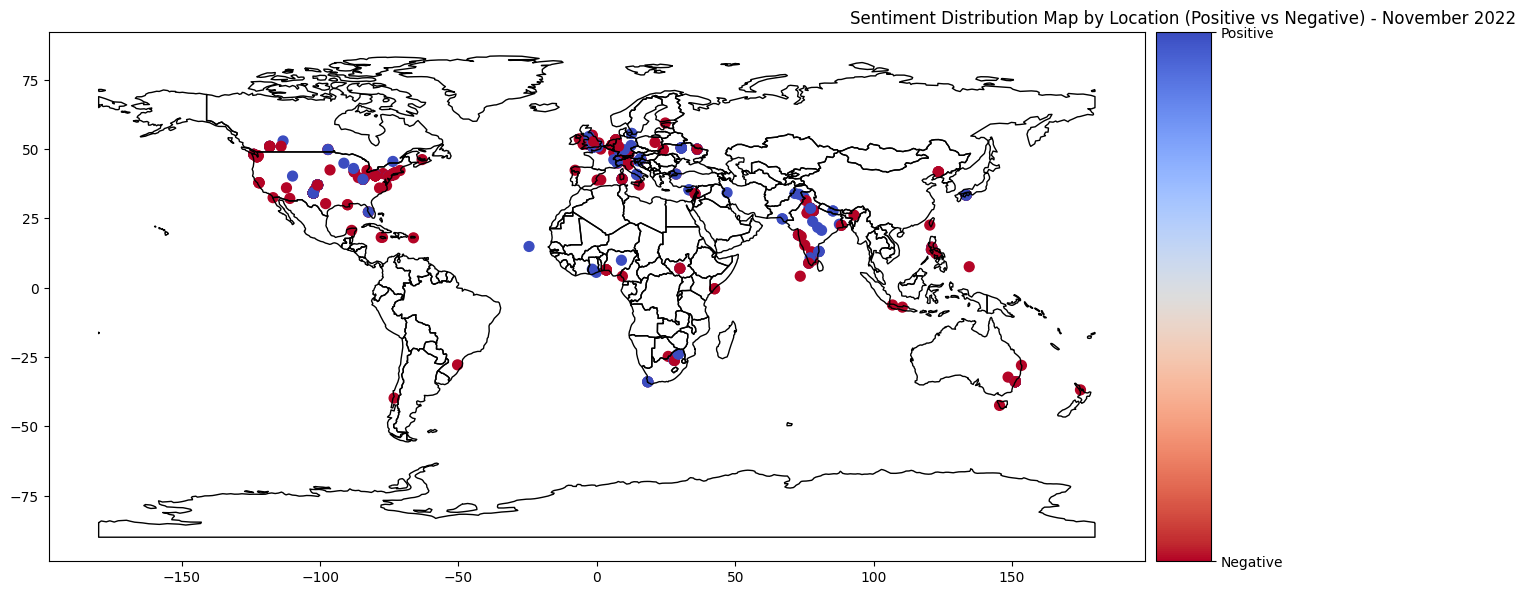

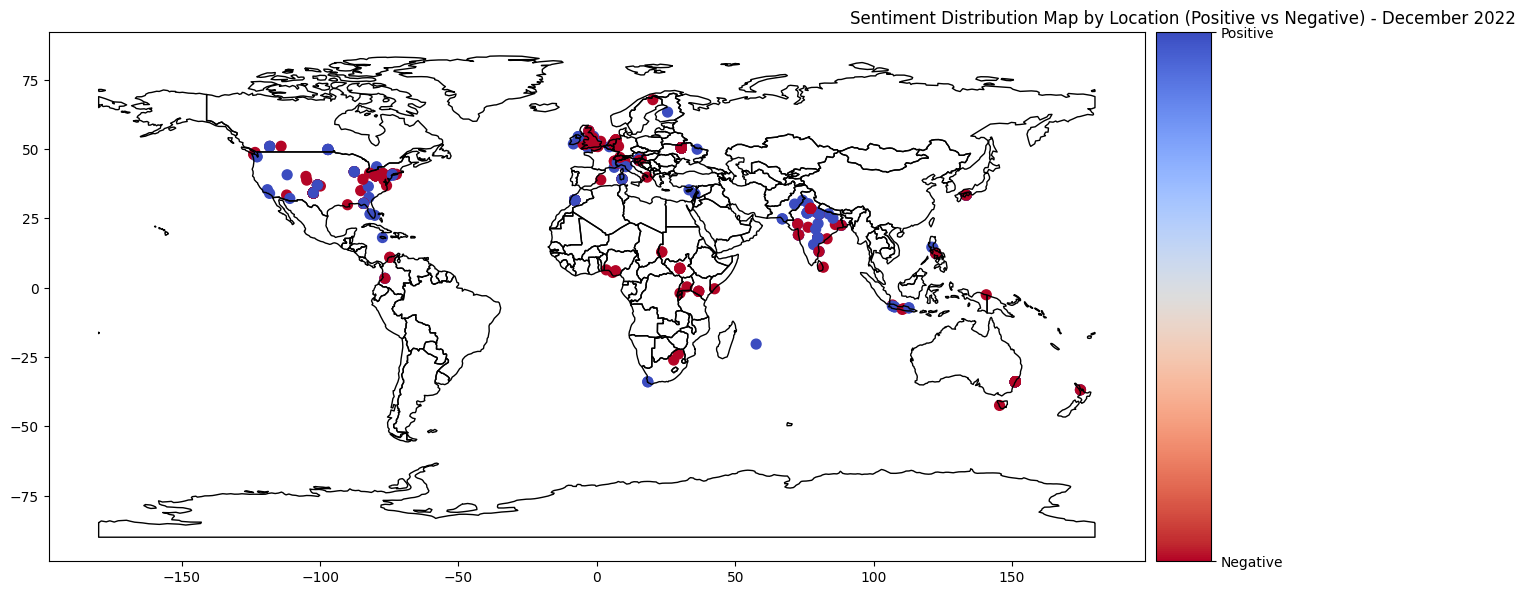

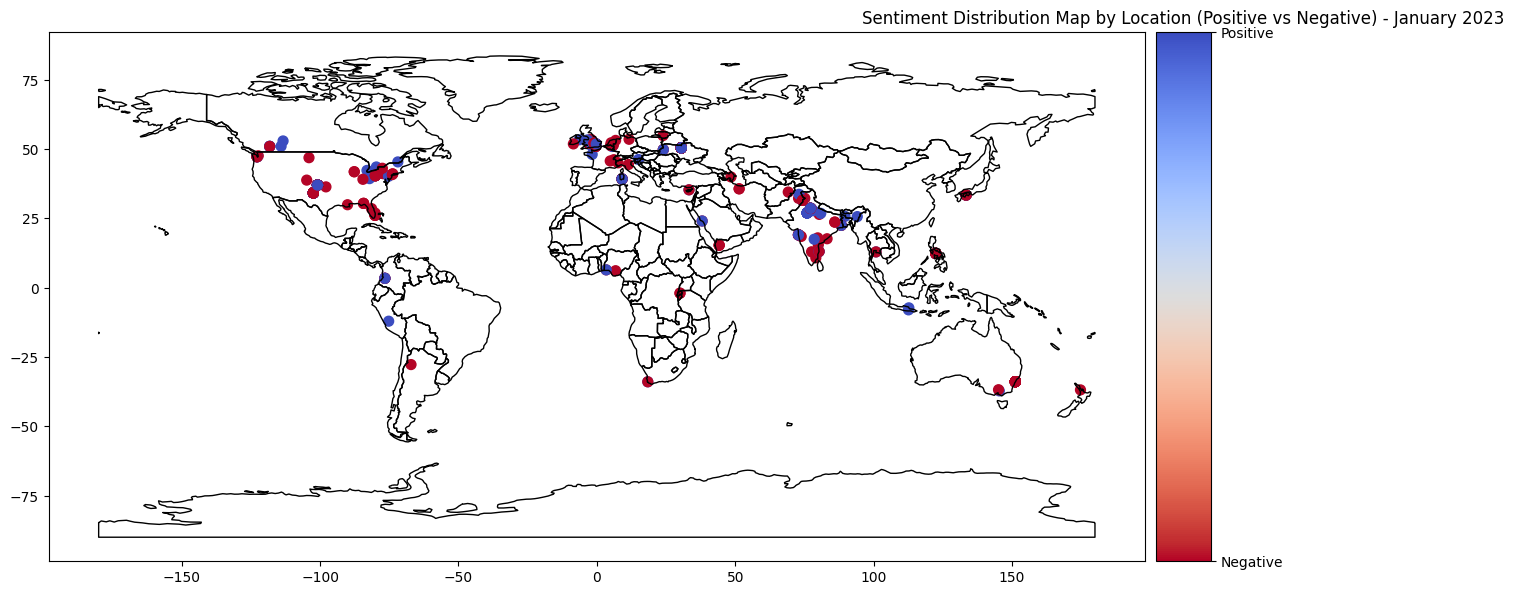

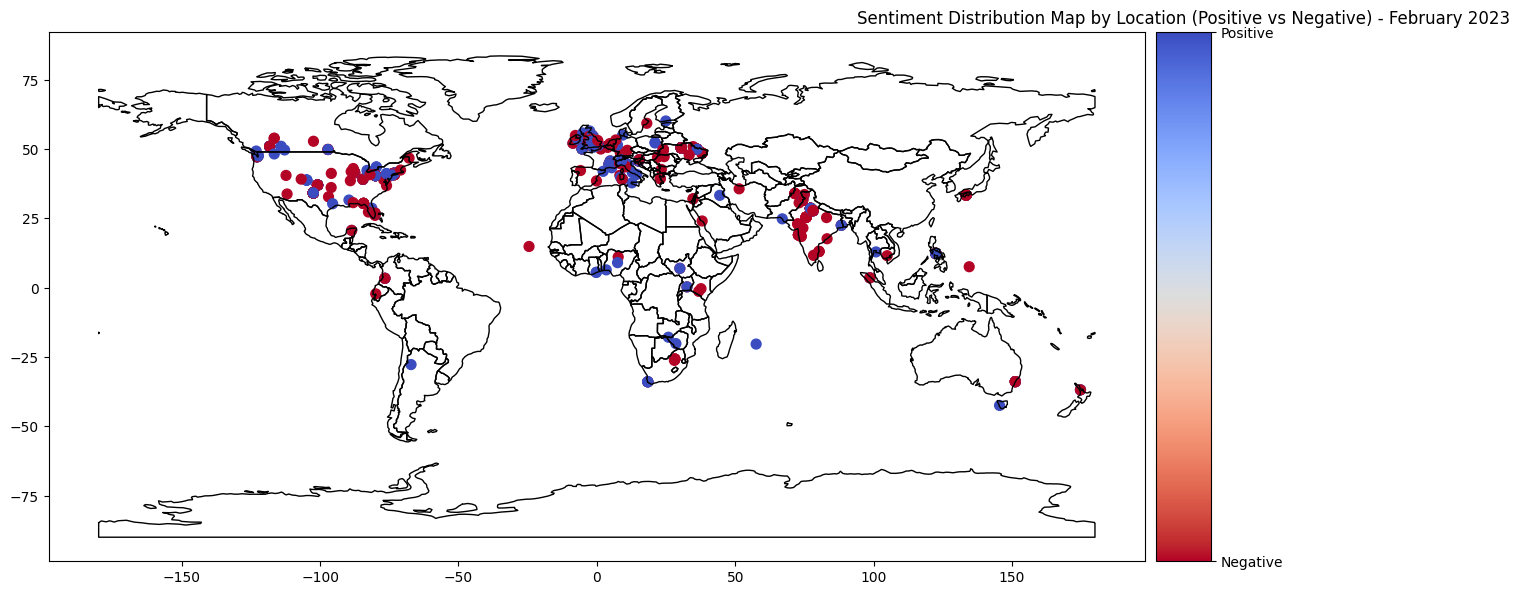

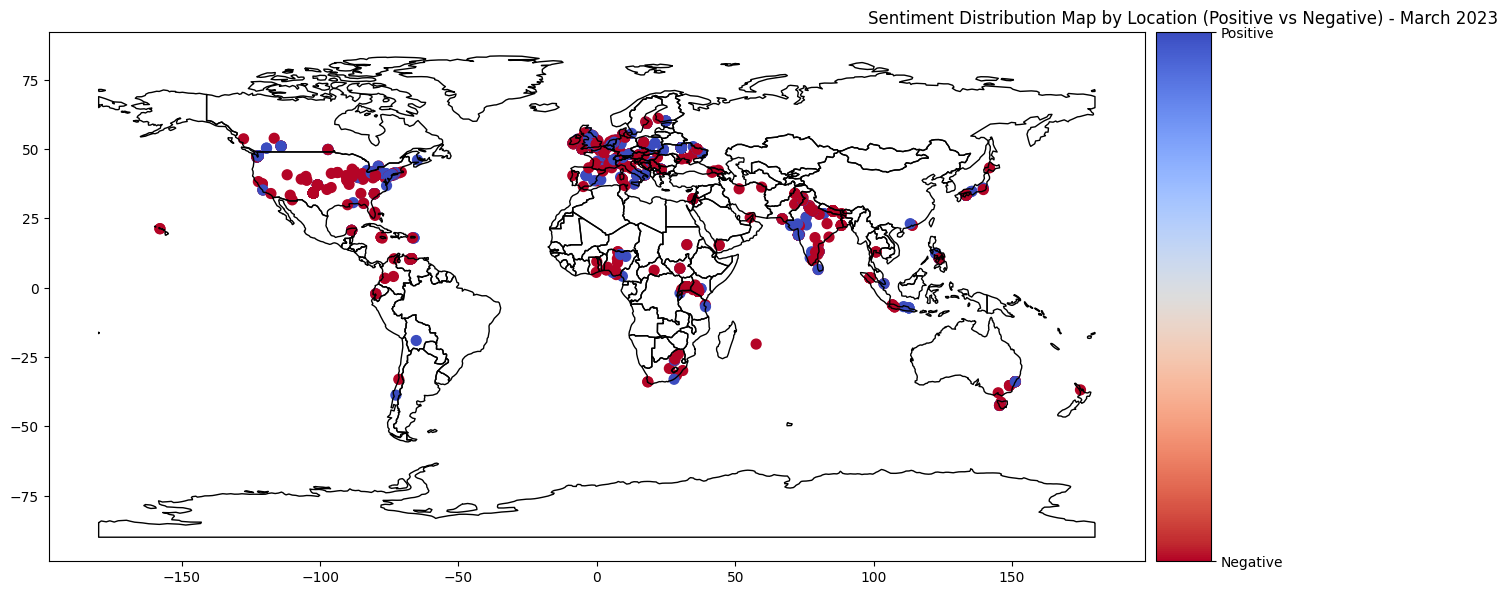

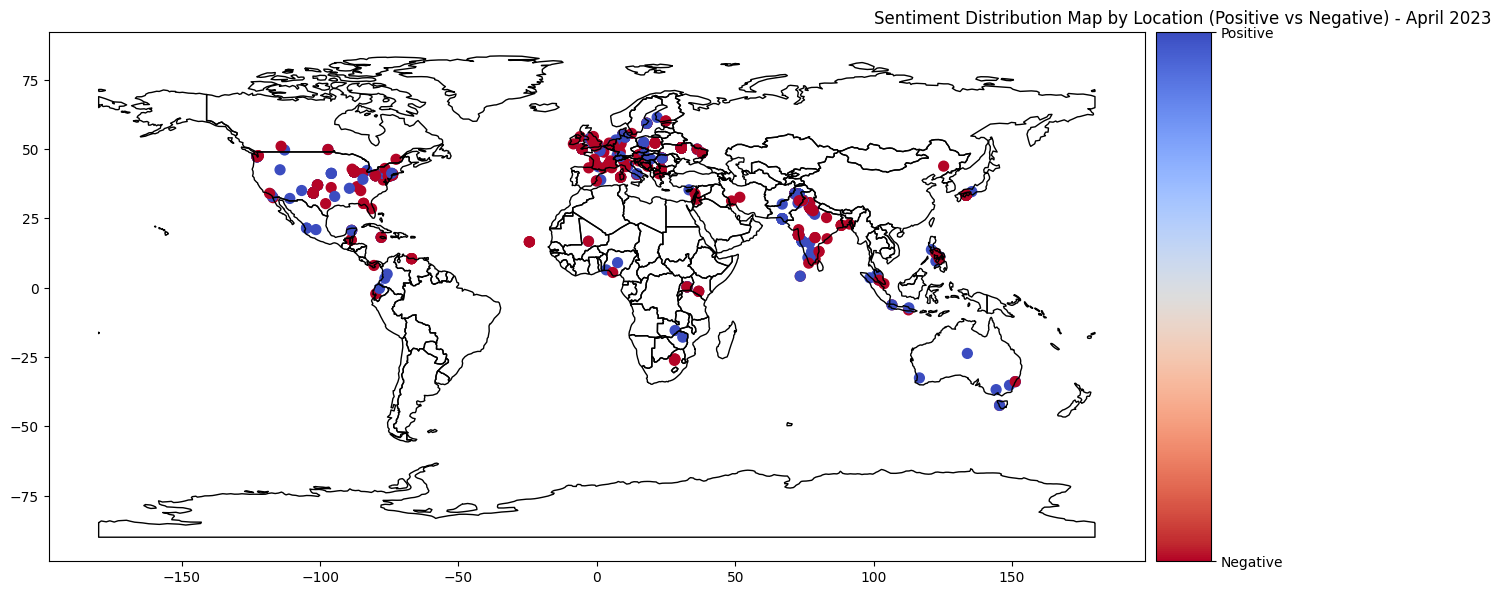

In [49]:

# This code is designed to visualize the monthly distribution of sentiment (positive vs. negative) for a given set of tweets. 
# This is same as upper one , but we use lon and lat column instead of county column for plot.


#BEGIN[ChatGPT][https://chat.openai.com/auth/login]

# I copy and pasted the ChatGPT to make a skeleton code and then I revised the code which did not work or weird

# command: Using the above result , make a ploy using lon and lat value instead of country column

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Prepare the date range
start_date = datetime.datetime(2022, 3, 1)
end_date = datetime.datetime(2023, 4, 30)
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')

# Loop through each month in the date range
for date in date_range:
    directory = './merged_by_country_bert_processed_tweets/'
    month_start = date
    month_end = date + pd.DateOffset(months=1) - pd.DateOffset(days=1)
    lon_list = []
    lat_list = []
    sentiment_sum_list = []

    for root, dirs, files in os.walk(directory):
        for filename in files:
            df = pd.read_csv(os.path.join(root, filename), encoding='UTF-8')
            for index, tweet in df.iterrows():
                tweet_date = pd.to_datetime(tweet['date'], errors='coerce')
                if month_start <= tweet_date <= month_end:
                    lon = tweet['lon']
                    lat = tweet['lat']
                    sentiment = tweet['sentiment']

                    lon_list.append(lon)
                    lat_list.append(lat)

                    sentiment_sum = 1 if sentiment == 'POSITIVE' else 0
                    sentiment_sum_list.append(sentiment_sum)

    # Create a DataFrame with lon, lat, and sentiment_sum for the current month
    df = pd.DataFrame({'lon': lon_list, 'lat': lat_list, 'sentiment_sum': sentiment_sum_list})

    # Plot the sentiment distribution on the world map using lon and lat
    fig, ax = plt.subplots(1, figsize=(15, 10))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    world.boundary.plot(ax=ax, linewidth=1, color='black')
    sm = plt.cm.ScalarMappable(cmap='coolwarm_r')
    sm.set_array(df['sentiment_sum'])

    ax.scatter(df['lon'], df['lat'], c=df['sentiment_sum'], cmap='coolwarm_r', s=50)

    # Customize the colorbar
    cbar = fig.colorbar(sm, cax=cax)
    cbar.set_ticks([cbar.vmin, cbar.vmax])
    cbar.set_ticklabels(['Negative', 'Positive'])

    plt.title(f"Sentiment Distribution Map by Location (Positive vs Negative) - {month_start.strftime('%B %Y')}")
    plt.show()

#END[ChatGPT]

